Mit diesem Code wird für jedes Jahr von 2015 bis 2022 ein farbiges Barcode-Bild erstellt, das auf der durchschnittlichen Farbe einer Sammlung von Bildern basiert. Der Farbbarcode ist eine visuelle Darstellung der dominanten Farben der Bilder, wobei jedes Bild einen einzelnen Farbbalken zum endgültigen Barcodebild beiträgt.

Das Bild wird mit OpenCV (cv2.imread) eingelesen. Falls das Bild ungültig ist (None), wird eine Warnmeldung angezeigt und zum nächsten Bild übergegangen. Die durchschnittliche Farbe des Bildes wird berechnet, indem die Pixelwerte entlang beider Achsen gemittelt werden. Anschließend wird ein Farbbalken (color_bar) mit der gleichen Durchschnittsfarbe erstellt, der die Abmessungen 100x1 hat und dieselbe Anzahl von Farbkanälen wie das Eingabebild besitzt.

In [14]:
import os
import cv2
import numpy as np
import pandas as pd

base_path = '../'
years = range(2015, 2023)

for year in years:
    csv_file_path = os.path.join(base_path, str(year), f'{year}.csv')

    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        image_paths = df['relative_path']
        output_path = os.path.join(base_path, str(year), f'{year}_barcode.png')

        barcode = None
        for img_path in image_paths:
            img = cv2.imread(img_path)

            if img is None:
                print(f"Warning: Unable to read image {img_path}. Skipping.")
                continue

            avg_color = np.average(np.average(img, axis=0), axis=0)
            color_bar = np.zeros((100, 1, 3), dtype=np.uint8)
            color_bar[:] = avg_color

            if barcode is None:
                barcode = color_bar
            else:
                barcode = np.hstack((barcode, color_bar))

        if barcode is not None:
            cv2.imwrite(output_path, barcode)
        else:
            print("No valid images found to create barcode.")
    else:
        print(f"CSV file not found for year {year}: {csv_file_path}")


Auf der Grundlage der Graustufenversion eines Bildes errechnet der mitgelieferte Code die durchschnittliche Helligkeit. Die Pixelwerte in einem Graustufenbild reichen von 0 bis 255, wobei 0 schwarz und 255 weiß bedeutet. Daher liegt auch der durchschnittliche Helligkeitswert in diesem Bereich (0 bis 255).

Ein niedriger durchschnittlicher Helligkeitswert (nahe bei 0) bedeutet, dass das Bild im Allgemeinen dunkler ist, während ein höherer durchschnittlicher Helligkeitswert (nahe bei 255) bedeutet, dass das Bild im Allgemeinen heller ist.

Dafür werden cv2 und numpy verwendet.

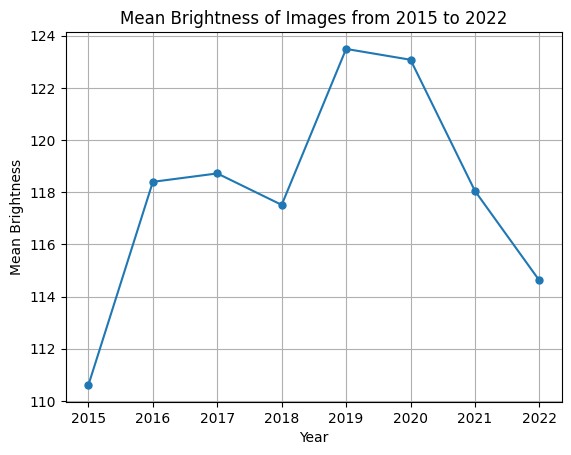

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_path = '../'
years = range(2015, 2023)
mean_brightness_values = []

for year in years:
    
    csv_file_path = os.path.join(base_path, str(year), f'{year}.csv')

    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        image_paths = df['relative_path']
        brightness_sum = 0
        valid_image_count = 0

        for img_path in image_paths:
            img = cv2.imread(img_path)
            if img is not None:
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                brightness_sum += np.mean(gray_img)
                valid_image_count += 1

        if valid_image_count > 0:
            mean_brightness_values.append(brightness_sum / valid_image_count)
        else:
            mean_brightness_values.append(None)
            print(f"No valid images found for year {year}.")
    else:
        mean_brightness_values.append(None)
        print(f"CSV file not found for year {year}: {csv_file_path}")

# Plot the mean brightness values
plt.plot(years, mean_brightness_values, marker='o', linestyle='-', markersize=5)
plt.xlabel('Year')
plt.ylabel('Mean Brightness')
plt.title('Mean Brightness of Images from 2015 to 2022')
plt.xticks(years)
plt.grid()
plt.show()
